# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Gilang Ferdiansyah
- **Email:** m009d4ky2095@bangkit.academy
- **ID Dicoding:** pohoncemara2

## Menentukan Pertanyaan Bisnis

- Bagaimana pola sewa sepeda harian berdasarkan waktu, seperti perubahan jumlah sewa dalam satu bulan atau per jam?
- Apakah terdapat perbedaan pola sewa sepeda harian antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
hour = pd.read_csv('hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
print("Jumlah baris di DataFrame day:", day.shape[0])
print("Jumlah baris di DataFrame hour:", hour.shape[0])

Jumlah baris di DataFrame day: 731
Jumlah baris di DataFrame hour: 17379


### Menggabungkan data day dan hour


In [10]:
bike_share = day.merge(hour, on='dteday', how='inner', suffixes=('_daily', '_hourly'))
print(bike_share.shape)
# df_product.head()
bike_share.loc[bike_share["dteday"].isnull()]
bike_share.head()

(17379, 32)


,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant_daily      17379 non-null  int64  
 1   dteday             17379 non-null  object 
 2   season_daily       17379 non-null  int64  
 3   yr_daily           17379 non-null  int64  
 4   mnth_daily         17379 non-null  int64  
 5   holiday_daily      17379 non-null  int64  
 6   weekday_daily      17379 non-null  int64  
 7   workingday_daily   17379 non-null  int64  
 8   weathersit_daily   17379 non-null  int64  
 9   temp_daily         17379 non-null  float64
 10  atemp_daily        17379 non-null  float64
 11  hum_daily          17379 non-null  float64
 12  windspeed_daily    17379 non-null  float64
 13  casual_daily       17379 non-null  int64  
 14  registered_daily   17379 non-null  int64  
 15  cnt_daily          17379 non-null  int64  
 16  instant_hourly     173

### Assessing Data

In [12]:
print(bike_share.shape)
bike_share.isnull().sum()

(17379, 32)


instant_daily        0
dteday               0
season_daily         0
yr_daily             0
mnth_daily           0
holiday_daily        0
weekday_daily        0
workingday_daily     0
weathersit_daily     0
temp_daily           0
atemp_daily          0
hum_daily            0
windspeed_daily      0
casual_daily         0
registered_daily     0
cnt_daily            0
instant_hourly       0
season_hourly        0
yr_hourly            0
mnth_hourly          0
hr                   0
holiday_hourly       0
weekday_hourly       0
workingday_hourly    0
weathersit_hourly    0
temp_hourly          0
atemp_hourly         0
hum_hourly           0
windspeed_hourly     0
casual_hourly        0
registered_hourly    0
cnt_hourly           0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", bike_share.duplicated().sum())
bike_share.describe()

Jumlah duplikasi:  0


,instant_daily,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [14]:
day.rename(columns={'yr': 'year', 'mnth': 'month', 'dteday': 'Date'}, inplace=True)

In [15]:
day['Date'] = pd.to_datetime(day['Date'])

In [16]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   Date        731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
hour.rename(columns={'yr': 'year', 'mnth': 'month', 'dteday': 'Date', 'hr' : 'hour'}, inplace=True)

In [18]:
hour['Date'] = pd.to_datetime(hour['Date'])

In [19]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   Date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

In [7]:
def range(series):
    return series.max() - series.min()

In [20]:
bike_share.describe(include="all")

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Explore ...

In [25]:
bike_share.groupby(by="mnth_daily").agg({
    "workingday_hourly": "count",
    "windspeed_hourly": ["max", "min", "mean", lambda x: x.max() - x.min()]
}).sort_values(by=("workingday_hourly", "count"), ascending=False)

workingday_hourly windspeed_hourly                          
                       count              max  min      mean <lambda_0>
mnth_daily                                                             
5                       1488           0.6119  0.0  0.182989     0.6119
7                       1488           0.8507  0.0  0.166059     0.8507
12                      1483           0.6567  0.0  0.176574     0.6567
8                       1475           0.8358  0.0  0.171468     0.8358
3                       1473           0.6866  0.0  0.222517     0.6866
10                      1451           0.5821  0.0  0.171919     0.5821
6                       1440           0.5821  0.0  0.185420     0.5821
4                       1437           0.7164  0.0  0.234323     0.7164
9                       1437           0.6418  0.0  0.165856     0.6418
11                      1437           0.6418  0.0  0.183764     0.6418
1                       1429           0.6567  0.0  0.207551     0.6567
2                       1341           0.8060  0.0  0.215961     0.8060

In [23]:
bike_share.groupby(by="mnth_daily").agg({
    "workingday_hourly": "count",
    "windspeed_hourly": ["max", "min", "mean", lambda x: x.max() - x.min()]
}).sort_values(by=("windspeed_hourly", "max"), ascending=False)

workingday_hourly windspeed_hourly                          
                       count              max  min      mean <lambda_0>
mnth_daily                                                             
7                       1488           0.8507  0.0  0.166059     0.8507
8                       1475           0.8358  0.0  0.171468     0.8358
2                       1341           0.8060  0.0  0.215961     0.8060
4                       1437           0.7164  0.0  0.234323     0.7164
3                       1473           0.6866  0.0  0.222517     0.6866
1                       1429           0.6567  0.0  0.207551     0.6567
12                      1483           0.6567  0.0  0.176574     0.6567
9                       1437           0.6418  0.0  0.165856     0.6418
11                      1437           0.6418  0.0  0.183764     0.6418
5                       1488           0.6119  0.0  0.182989     0.6119
6                       1440           0.5821  0.0  0.185420     0.5821
10                      1451           0.5821  0.0  0.171919     0.5821

In [26]:
bike_share.groupby(by="mnth_daily").agg({
    "workingday_hourly": "count",
    "windspeed_hourly": ["max", "min", "mean", lambda x: x.max() - x.min()]
}).sort_values(by=("windspeed_hourly", "min"), ascending=False)

workingday_hourly windspeed_hourly                          
                       count              max  min      mean <lambda_0>
mnth_daily                                                             
1                       1429           0.6567  0.0  0.207551     0.6567
2                       1341           0.8060  0.0  0.215961     0.8060
3                       1473           0.6866  0.0  0.222517     0.6866
4                       1437           0.7164  0.0  0.234323     0.7164
5                       1488           0.6119  0.0  0.182989     0.6119
6                       1440           0.5821  0.0  0.185420     0.5821
7                       1488           0.8507  0.0  0.166059     0.8507
8                       1475           0.8358  0.0  0.171468     0.8358
9                       1437           0.6418  0.0  0.165856     0.6418
10                      1451           0.5821  0.0  0.171919     0.5821
11                      1437           0.6418  0.0  0.183764     0.6418
12                      1483           0.6567  0.0  0.176574     0.6567

In [27]:
bike_share.groupby(by="mnth_daily").agg({
    "workingday_hourly": "count",
    "windspeed_hourly": ["max", "min", "mean", lambda x: x.max() - x.min()]
}).sort_values(by=("windspeed_hourly", "mean"), ascending=False)

workingday_hourly windspeed_hourly                          
                       count              max  min      mean <lambda_0>
mnth_daily                                                             
4                       1437           0.7164  0.0  0.234323     0.7164
3                       1473           0.6866  0.0  0.222517     0.6866
2                       1341           0.8060  0.0  0.215961     0.8060
1                       1429           0.6567  0.0  0.207551     0.6567
6                       1440           0.5821  0.0  0.185420     0.5821
11                      1437           0.6418  0.0  0.183764     0.6418
5                       1488           0.6119  0.0  0.182989     0.6119
12                      1483           0.6567  0.0  0.176574     0.6567
10                      1451           0.5821  0.0  0.171919     0.5821
8                       1475           0.8358  0.0  0.171468     0.8358
7                       1488           0.8507  0.0  0.166059     0.8507
9                       1437           0.6418  0.0  0.165856     0.6418

### Corellation


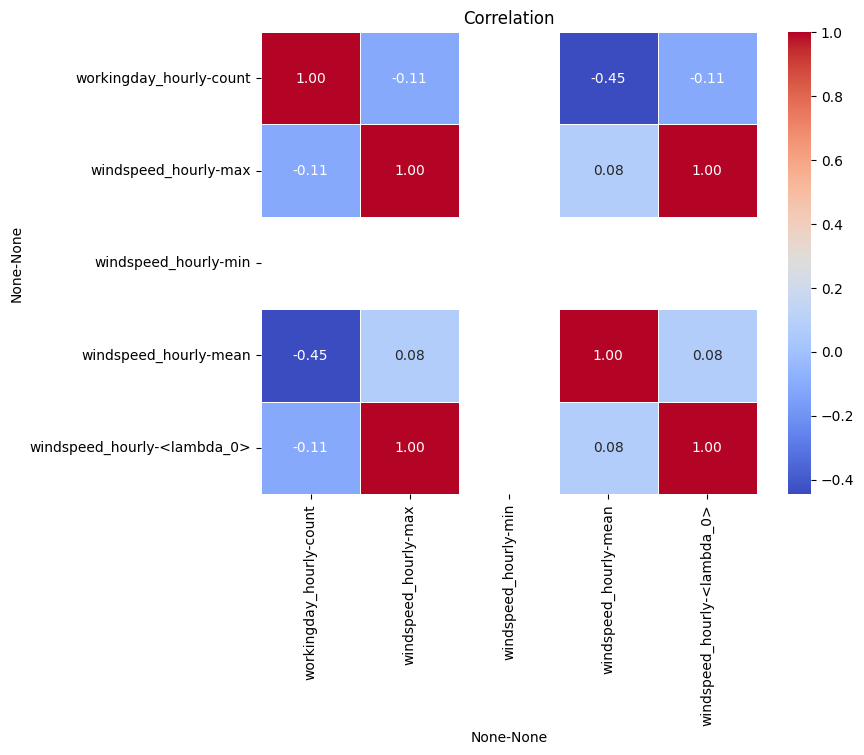

In [31]:
# Mengelompokkan dan menghitung statistik
grouped_data = bike_share.groupby(by="mnth_daily").agg({
    "workingday_hourly": "count",
    "windspeed_hourly": ["max", "min", "mean", lambda x: x.max() - x.min()]
}).sort_values(by=("workingday_hourly", "count"), ascending=False)

# Mengambil kolom yang diinginkan untuk menghitung korelasi
data_korelasi = grouped_data[["workingday_hourly", "windspeed_hourly"]]

# Menghitung korelasi
korelasi_result = data_korelasi.corr()

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(korelasi_result, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

plt.title('Correlation')
plt.show()

## Visualization & Explanatory Analysis

1. Bagaimana pola sewa sepeda harian berdasarkan bulan, seperti perubahan jumlah sewa dalam satu bulan ?

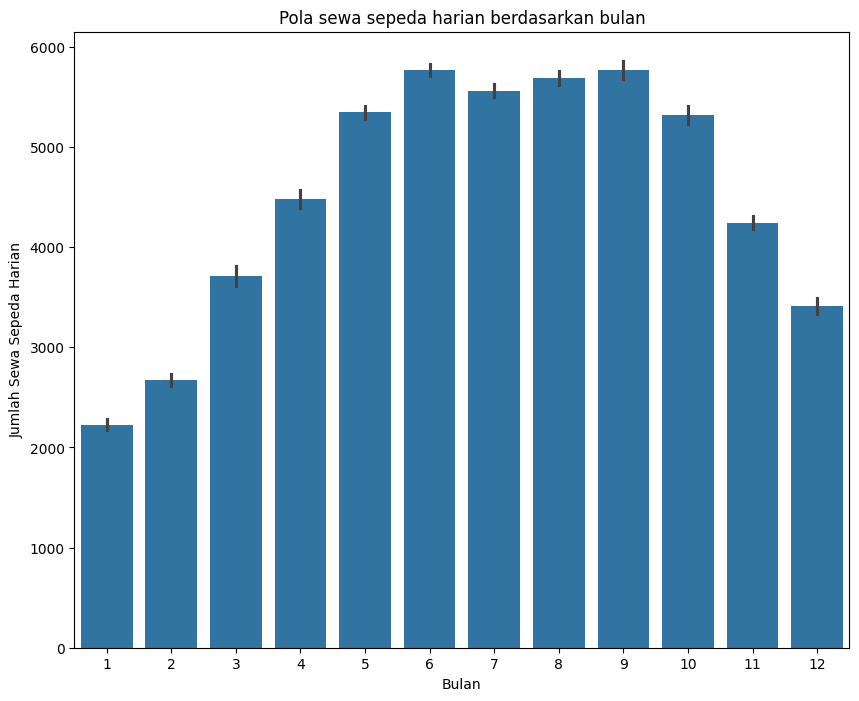

In [35]:
plt.figure(figsize=(10, 8))
sns.barplot(x="mnth_daily", y="cnt_daily", data=bike_share)
plt.title("Pola sewa sepeda harian berdasarkan bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

Jumlah sewa sepeda harian meningkat secara signifikan dari Januari hingga Juni, Kemudian penyewaan sepeda menurun pada bulan juli dan agustus, lalu meningkat lagi pada bulan septeber dan kembali menurun pada bulan oktober - desember

faktor-faktor yang paling mempengaruhi:
*   Cuaca:
Cuaca yang cerah dan hangat umumnya mendorong lebih banyak orang untuk bersepeda.
Cuaca yang buruk, seperti hujan lebat atau angin kencang, dapat menurunkan tingkat sewa sepeda.
*   Musim : Musim Kemarau dan Musim Hujan



2. Apakah terdapat perbedaan pola sewa sepeda harian antara hari kerja dan hari libur?

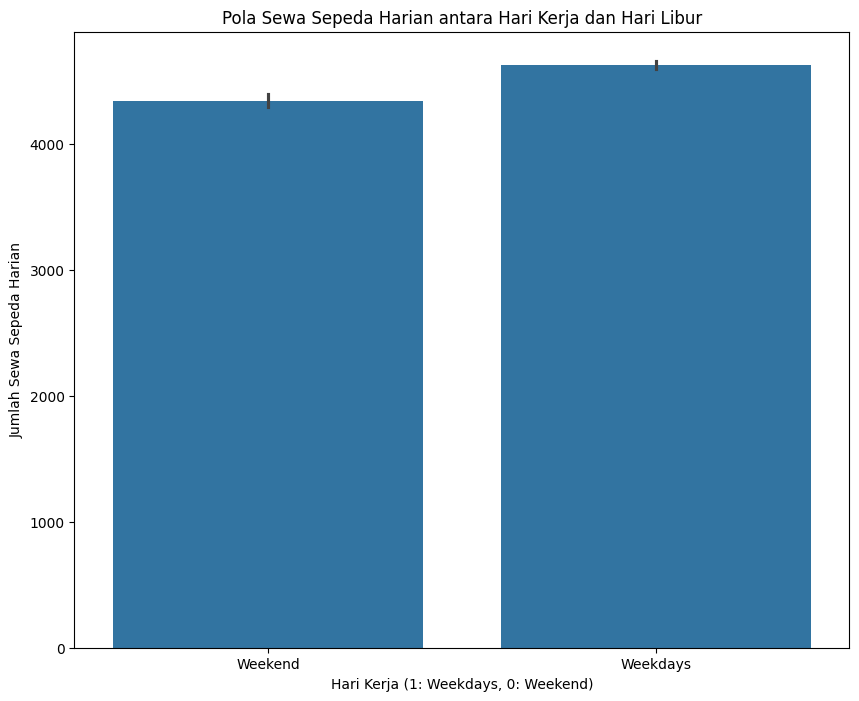

In [29]:
plt.figure(figsize=(10, 8))
sns.barplot(x="workingday_daily", y="cnt_daily", data=bike_share)

# Menambahkan keterangan "weekend" dan "weekdays"
plt.title("Pola Sewa Sepeda Harian antara Hari Kerja dan Hari Libur")
plt.xlabel("Hari Kerja (1: Weekdays, 0: Weekend)")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.xticks([0, 1], ["Weekend", "Weekdays"])  # Menambahkan label pada sumbu x

plt.show()

## Conclusion

- Conclution  Bagaimana pola sewa sepeda harian berdasarkan bulan, seperti perubahan jumlah sewa dalam satu bulan ? Pola sewa sepeda harian berdasarkan bulan menunjukkan bahwa musim dan cuaca adalah faktor utama yang mempengaruhi tingkat sewa. Musim kemarau dan cuaca cerah umumnya mendorong lebih banyak orang untuk bersepeda, sehingga meningkatkan tingkat sewa.


- Conclution Apakah terdapat perbedaan pola sewa sepeda harian antara hari kerja dan hari libur?Ya, Jumlah Sewa sepeda lebih banyak di hari kerja dibandingkan dengan hari libur